In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
import seaborn as sb

In [3]:
data = pd.read_csv('for_correlation.csv')

In [5]:
data.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,Lux
0,06-07-2022,23:45:00,26.0,61.8,1013,0,2
1,07-07-2022,00:00:00,26.3,62.1,992,0,2
2,07-07-2022,00:15:00,26.6,63.2,966,0,2
3,07-07-2022,00:30:00,26.8,63.8,949,0,3
4,07-07-2022,00:45:00,26.9,66.4,881,0,3


In [7]:
data['exact_time'] = data['Location']+ ' ' + data['Timestamp']

In [9]:
data.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,Lux,exact_time
0,06-07-2022,23:45:00,26.0,61.8,1013,0,2,06-07-2022 23:45:00
1,07-07-2022,00:00:00,26.3,62.1,992,0,2,07-07-2022 00:00:00
2,07-07-2022,00:15:00,26.6,63.2,966,0,2,07-07-2022 00:15:00
3,07-07-2022,00:30:00,26.8,63.8,949,0,3,07-07-2022 00:30:00
4,07-07-2022,00:45:00,26.9,66.4,881,0,3,07-07-2022 00:45:00


[]

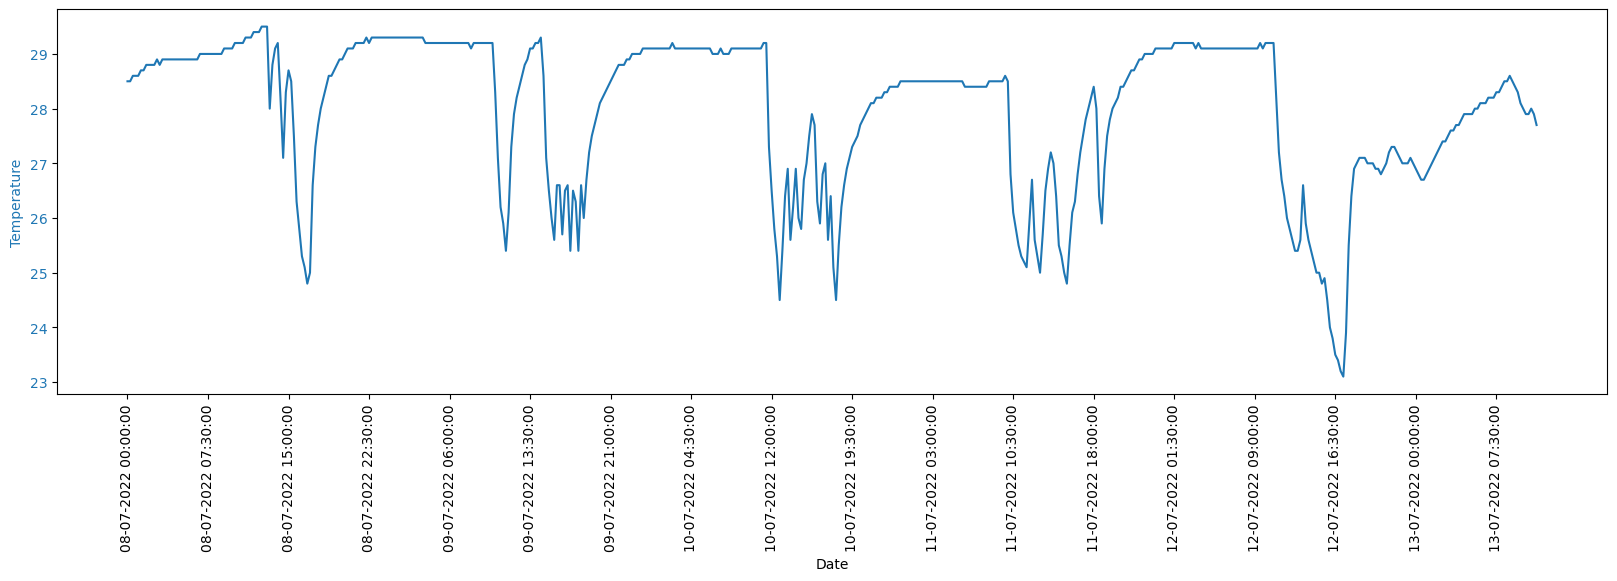

In [11]:
x = data['exact_time'][97:623]
y1 = data['Temperature'][97:623]

fig, ax1 = plt.subplots()
    
    
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature', color='tab:blue')
ax1.plot(x, y1, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_xticks(x[::30])
ax1.set_xticklabels(x[::30], rotation=90)

ax1.figure.set_figwidth(20)
ax1.figure.set_figheight(5)

plt.plot()

[]

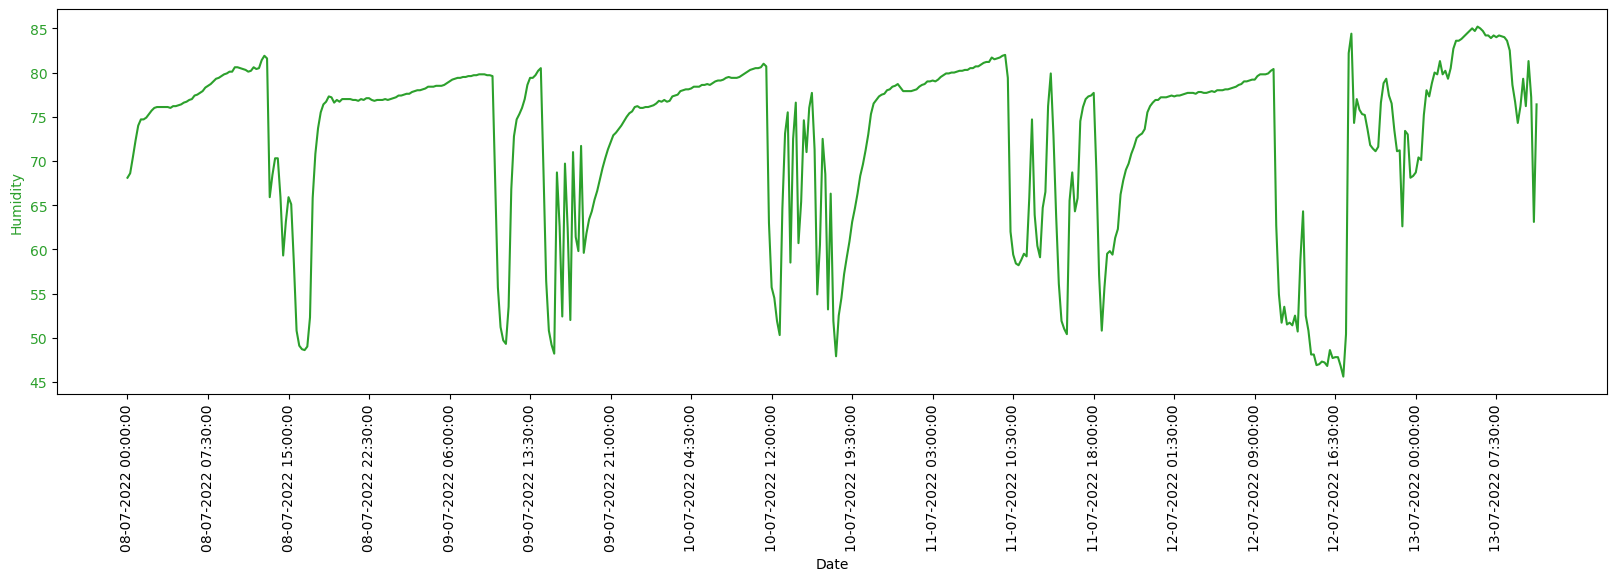

In [13]:
x = data['exact_time'][97:623]
y1 = data['Humidity'][97:623]

fig, ax1 = plt.subplots()
    
    
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity', color='tab:green')
ax1.plot(x, y1, color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax1.set_xticks(x[::30])
ax1.set_xticklabels(x[::30], rotation=90)

ax1.figure.set_figwidth(20)
ax1.figure.set_figheight(5)

plt.plot()

[]

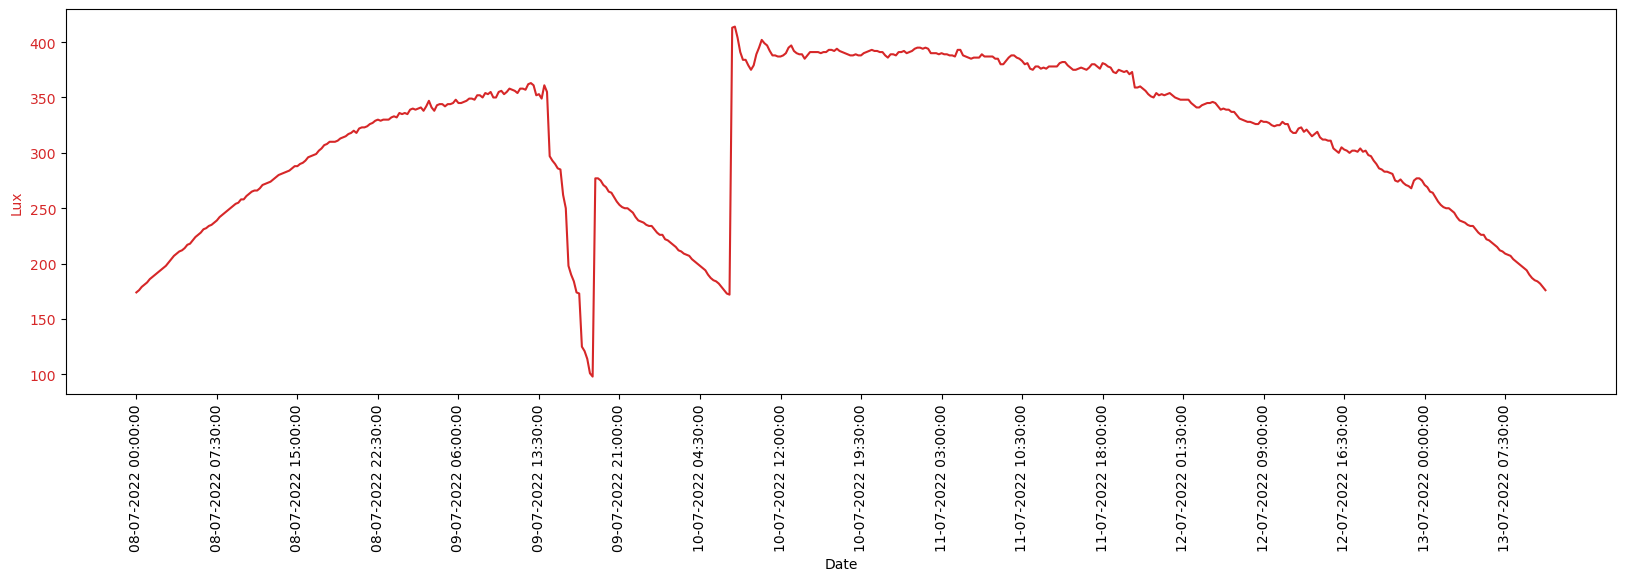

In [15]:
x = data['exact_time'][97:623]
y1 = data['Lux'][97:623]

fig, ax1 = plt.subplots()
    
    
ax1.set_xlabel('Date')
ax1.set_ylabel('Lux', color='tab:red')
ax1.plot(x, y1, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax1.set_xticks(x[::30])
ax1.set_xticklabels(x[::30], rotation=90)

ax1.figure.set_figwidth(20)
ax1.figure.set_figheight(5)

plt.plot()

[]

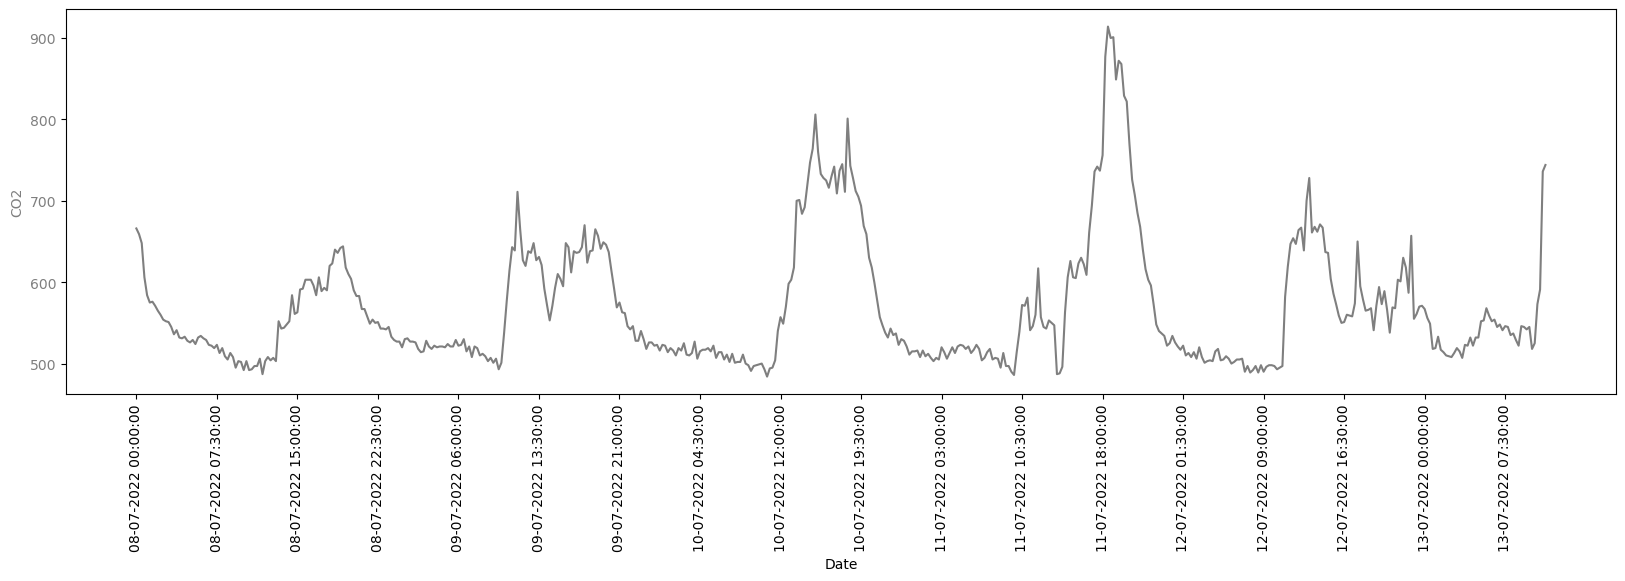

In [17]:
x = data['exact_time'][97:623]
y1 = data['CO2'][97:623]

fig, ax1 = plt.subplots()
    
    
ax1.set_xlabel('Date')
ax1.set_ylabel('CO2', color='tab:grey')
ax1.plot(x, y1, color='tab:grey')
ax1.tick_params(axis='y', labelcolor='tab:grey')

ax1.set_xticks(x[::30])
ax1.set_xticklabels(x[::30], rotation=90)

ax1.figure.set_figwidth(20)
ax1.figure.set_figheight(5)

plt.plot()

[]

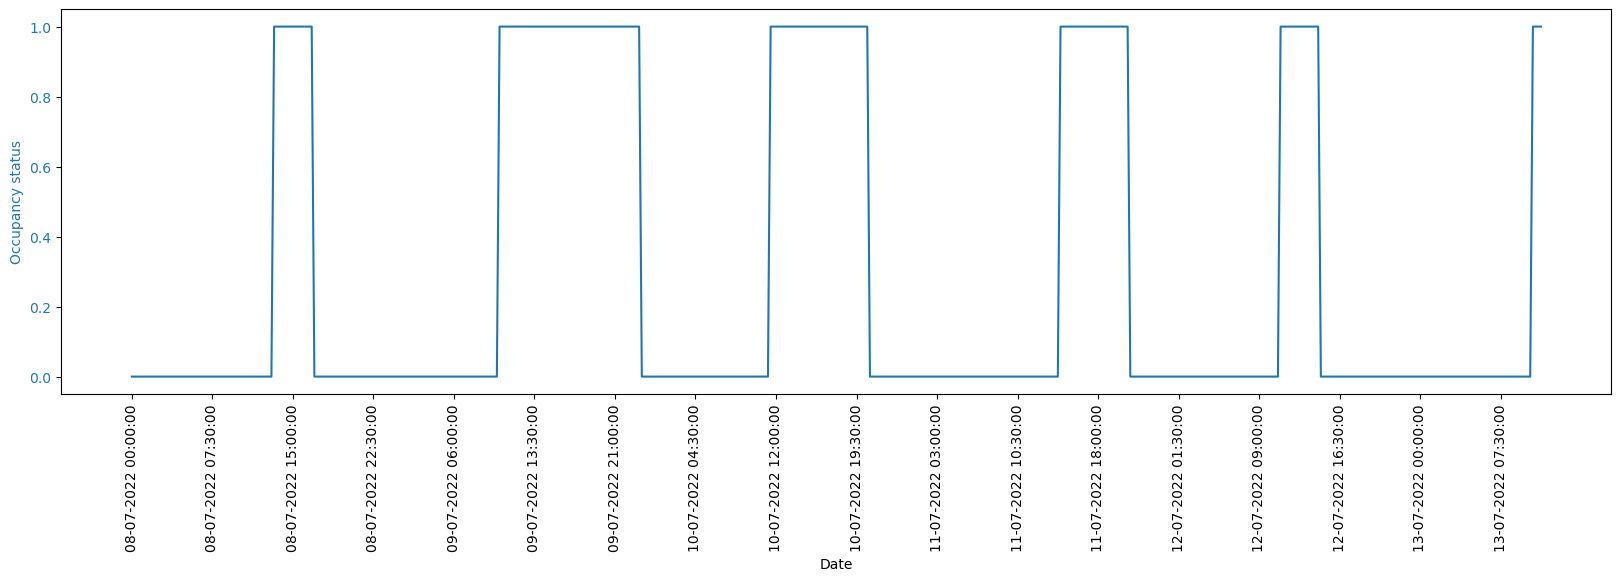

In [19]:
x = data['exact_time'][97:623]
y1 = data['Occupancy status'][97:623]

fig, ax1 = plt.subplots()
    
    
ax1.set_xlabel('Date')
ax1.set_ylabel('Occupancy status', color='tab:blue')
ax1.plot(x, y1, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_xticks(x[::30])
ax1.set_xticklabels(x[::30], rotation=90)

ax1.figure.set_figwidth(20)
ax1.figure.set_figheight(5)

plt.plot()

In [21]:
data.head(-1)

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,Lux,exact_time
0,06-07-2022,23:45:00,26.0,61.8,1013,0,2,06-07-2022 23:45:00
1,07-07-2022,00:00:00,26.3,62.1,992,0,2,07-07-2022 00:00:00
2,07-07-2022,00:15:00,26.6,63.2,966,0,2,07-07-2022 00:15:00
3,07-07-2022,00:30:00,26.8,63.8,949,0,3,07-07-2022 00:30:00
4,07-07-2022,00:45:00,26.9,66.4,881,0,3,07-07-2022 00:45:00
...,...,...,...,...,...,...,...,...
619,13-07-2022,10:30:00,27.9,81.3,573,1,184,13-07-2022 10:30:00
620,13-07-2022,10:45:00,28.0,77.2,591,1,182,13-07-2022 10:45:00
621,13-07-2022,11:00:00,27.9,63.1,736,1,179,13-07-2022 11:00:00
622,13-07-2022,11:15:00,27.7,76.4,744,1,176,13-07-2022 11:15:00


In [23]:
def create_week_status(location_value):
    
    list_of_07 = [2,3,9,10,16,17,23,24,30,31]
    list_of_08 = [6,7,13,14,20,21,27,28]
    list_of_09 = [3,4,10,11,17,18,24,25]
    
    if int(location_value[3:5]) == 6:
        return 1
    
    elif int(location_value[3:5]) == 7:
        if int(location_value[0:2]) in list_of_07:
            return 0
        else:
            return 1
    
    elif int(location_value[3:5]) == 8:
        if int(location_value[0:2]) in list_of_08:
            return 0
        else:
            return 1
        
    elif int(location_value[3:5]) == 9:
        if int(location_value[0:2]) in list_of_09:
            return 0
        else:
            return 1

In [32]:
data['week_status'] = data['Location'].apply(create_week_status)

In [38]:
numeric_dataset = data.select_dtypes(include=['number'])
print(numeric_dataset.corr())

                  Temperature  Humidity       CO2  Occupancy status       Lux  \
Temperature          1.000000  0.833331 -0.513468         -0.302667  0.080338   
Humidity             0.833331  1.000000 -0.573717         -0.447712  0.014296   
CO2                 -0.513468 -0.573717  1.000000          0.460203 -0.119384   
Occupancy status    -0.302667 -0.447712  0.460203          1.000000  0.226661   
Lux                  0.080338  0.014296 -0.119384          0.226661  1.000000   
week_status         -0.150874 -0.028715  0.037835         -0.350088 -0.239689   

                  week_status  
Temperature         -0.150874  
Humidity            -0.028715  
CO2                  0.037835  
Occupancy status    -0.350088  
Lux                 -0.239689  
week_status          1.000000  


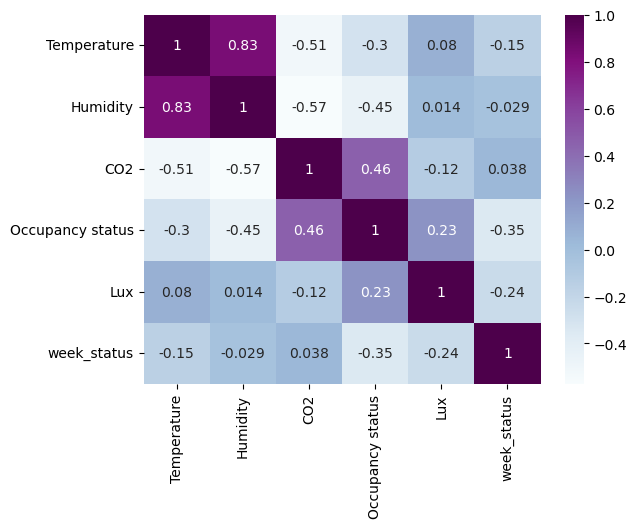

In [42]:
numeric_data = data.select_dtypes(include=['number'])
dataplot = sb.heatmap(numeric_data.corr(), cmap="BuPu", annot=True)
plt.show()

In [44]:
'''

THINGS LEFT

ROC curve 
update hyper-parameters and accuracies
writeup
predicted vs true


'''

'\n\nTHINGS LEFT\n\nROC curve \nupdate hyper-parameters and accuracies\nwriteup\npredicted vs true\n\n\n'

In [46]:
data.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,Lux,exact_time,week_status
0,06-07-2022,23:45:00,26.0,61.8,1013,0,2,06-07-2022 23:45:00,1
1,07-07-2022,00:00:00,26.3,62.1,992,0,2,07-07-2022 00:00:00,1
2,07-07-2022,00:15:00,26.6,63.2,966,0,2,07-07-2022 00:15:00,1
3,07-07-2022,00:30:00,26.8,63.8,949,0,3,07-07-2022 00:30:00,1
4,07-07-2022,00:45:00,26.9,66.4,881,0,3,07-07-2022 00:45:00,1


In [48]:
from pyensae.graphhelper import Corrplot

ModuleNotFoundError: No module named 'pyensae'

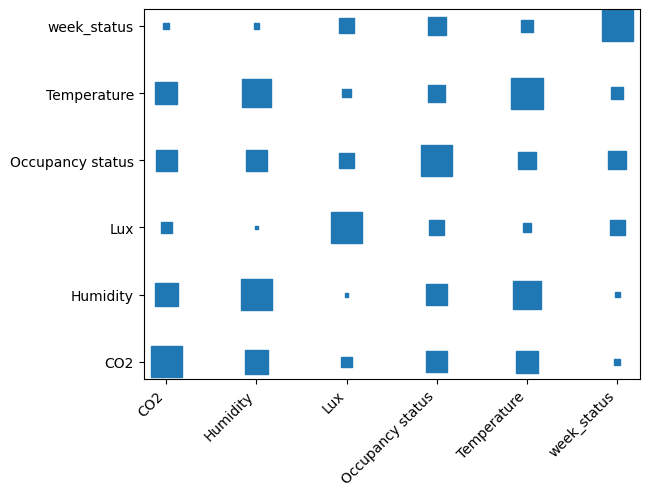

In [50]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    
    
    

columns = ['Temperature', 'Humidity', 'CO2', 'Occupancy status', 'Lux', 'week_status'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [52]:
data.head()

,Location,Timestamp,Temperature,Humidity,CO2,Occupancy status,Lux,exact_time,week_status
0,06-07-2022,23:45:00,26.0,61.8,1013,0,2,06-07-2022 23:45:00,1
1,07-07-2022,00:00:00,26.3,62.1,992,0,2,07-07-2022 00:00:00,1
2,07-07-2022,00:15:00,26.6,63.2,966,0,2,07-07-2022 00:15:00,1
3,07-07-2022,00:30:00,26.8,63.8,949,0,3,07-07-2022 00:30:00,1
4,07-07-2022,00:45:00,26.9,66.4,881,0,3,07-07-2022 00:45:00,1
